In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
directory = '../data/'
output_dir = '../data/csv_grouped_data'

In [8]:
filename_ibex ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_ibex_2018-2020.csv"
filename_ibex_prices ="../data/ibex_historico.csv"
filename_precios_bolsa = "../data/es_mse_mean_day.csv"
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_2016-2020.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_ibex = pd.read_csv(filename_ibex, sep=";")
df_ibex_prices = pd.read_csv(filename_ibex_prices, sep=",")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_x = pd.merge(left=df_asoc, right=df_ibex, left_on='normalised_date', right_on='normalised_date')
df_total = pd.merge(left=df_x, right=df_ibex_prices, left_on='normalised_date', right_on='Date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_ibex"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_ibex", "Close"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones
df_total.sentiment_ibex = df_total.sentiment_ibex
df_total.Close = df_total.Close.diff()
df_total = df_total.rename(columns={"Close": "ibex_change", "price_change": "madrid_change"})

df_total['sentiment_asociacones_diff'] = df_total['sentiment_asociacones'].astype(float).diff()
df_total['sentiment_ibex_diff'] = df_total['sentiment_ibex'].astype(float).diff()

df_total['ibex_change'] = df_total['ibex_change'].astype(float)
df_total['madrid_change'] = df_total['madrid_change'].astype(float)

df_total = df_total.dropna()
df_total = df_total[['normalised_date','sentiment_asociacones', 'sentiment_ibex','sentiment_asociacones_diff', 'sentiment_ibex_diff', 'madrid_change']]

df_total = df_total.set_index('normalised_date')

df_total_no_covid = df_total.copy()
df_total_no_covid = df_total_no_covid[:-100]

df_total_es = df_total.copy()
df_total_no_covid_es = df_total_no_covid.copy()
df_total_es


,sentiment_asociacones,sentiment_ibex,sentiment_asociacones_diff,sentiment_ibex_diff,madrid_change
normalised_date,,,,,
2017-01-24,0.414193,0.463779,0.031742,-0.000420,1.260981
2017-01-25,0.406419,0.031743,-0.007774,-0.432036,1.614972
2017-01-26,0.367457,0.511189,-0.038962,0.479446,-0.810021
2017-01-27,0.414319,0.093482,0.046862,-0.417707,-0.140292
2017-01-30,0.405492,0.572095,-0.008826,0.478613,-1.385265
...,...,...,...,...,...
2020-05-13,0.323553,0.198299,-0.041074,-0.033898,-2.211644
2020-05-14,0.283648,0.211395,-0.039905,0.013097,-1.591394
2020-05-15,0.332006,0.247824,0.048358,0.036428,-0.840529


In [9]:
filename_asoc = "../data/grouped_data_day_mean_tweets_sentimentdata-scraper_asociaciones_peru-2016-2020.csv"
filename_empresas ="../data/grouped_data_day_mean_tweets_sentimentdata-scraper_empresas_peru_2017-2020.csv"
filename_precios_bolsa = "../data/pe_bvl_mean_day.csv"

df_asoc = pd.read_csv(filename_asoc, sep=";")
df_empresas = pd.read_csv(filename_empresas, sep=";")
df_precios_bolsa = pd.read_csv(filename_precios_bolsa, sep=";")

df_total = pd.merge(left=df_asoc, right=df_empresas, left_on='normalised_date', right_on='normalised_date')
df_total = df_total.rename(columns={"sentiment_x": "sentiment_asociacones", "sentiment_y": "sentiment_empresas"})
df_total["normalised_date"]= pd.to_datetime(df_total["normalised_date"]) 
df_total = df_total[["normalised_date","sentiment_asociacones", "sentiment_empresas"]]

df_precios_bolsa = df_precios_bolsa[["date", "price_change"]]
df_precios_bolsa["date"]= pd.to_datetime(df_precios_bolsa["date"]) 
df_total = pd.merge(left=df_total, right=df_precios_bolsa, left_on='normalised_date', right_on='date')

df_total.sentiment_asociacones = df_total.sentiment_asociacones
df_total.sentiment_empresas = df_total.sentiment_empresas
df_total = df_total.rename(columns={"price_change": "peru_change"})

df_total['sentiment_asociacones_diff'] = df_total['sentiment_asociacones'].astype(float).diff()
df_total['sentiment_empresas_diff'] = df_total['sentiment_empresas'].astype(float).diff()
df_total = df_total.dropna()

df_total['peru_change'] = df_total['peru_change'].astype(float)

df_total = df_total.set_index('normalised_date')

df_tota_no_covid = df_total.copy

df_tota_no_covid = df_total[:-100]

df_total_pe = df_total.copy()
df_tota_no_covid_pe = df_tota_no_covid.copy()


df_total_pe

,sentiment_asociacones,sentiment_empresas,date,peru_change,sentiment_asociacones_diff,sentiment_empresas_diff
normalised_date,,,,,,
2017-03-01,0.274190,0.352370,2017-03-01,-1.242825,-0.015294,0.105405
2017-03-02,0.224774,0.301128,2017-03-02,-0.395745,-0.049415,-0.051242
2017-03-03,0.387223,0.392072,2017-03-03,-2.106603,0.162448,0.090944
2017-03-06,0.346017,0.237617,2017-03-06,-0.668194,-0.041206,-0.154455
2017-03-07,0.287514,0.333051,2017-03-07,-0.817405,-0.058503,0.095434
...,...,...,...,...,...,...
2020-05-22,0.176138,0.296495,2020-05-22,0.538966,-0.048515,0.011398
2020-05-25,0.201416,0.253167,2020-05-25,0.628993,0.025278,-0.043328
2020-05-26,0.222221,0.213142,2020-05-26,0.736907,0.020805,-0.040025


In [35]:

from statsmodels.tsa.seasonal import seasonal_decompose

result_asoc_pe = seasonal_decompose(df_total_pe.sentiment_asociacones, model='additive', freq = 7)
result_empresas_pe = seasonal_decompose(df_total_pe.sentiment_empresas, model='additive', freq = 7)

result_asoc_es = seasonal_decompose(df_total_es.sentiment_asociacones, model='additive', freq = 7)
result_empresas_es = seasonal_decompose(df_total_es.sentiment_ibex, model='additive', freq = 7)



df_trends_pe = pd.merge(left=result_asoc_pe.trend, right=result_empresas_pe.trend, left_on='normalised_date', right_on='normalised_date')
df_trends_pe = df_trends_pe.rename(columns={"trend_x": "sentiment_asoc_trend", "trend_y": "sentiment_empresas_trend"})
df_trends_pe = pd.merge(left=df_trends_pe, right=df_total_pe.peru_change, left_on='normalised_date', right_on='normalised_date')

df_trends_es = pd.merge(left=result_asoc_es.trend, right=result_empresas_es.trend, left_on='normalised_date', right_on='normalised_date')
df_trends_es = df_trends_es.rename(columns={"trend_x": "sentiment_asoc_trend", "trend_y": "sentiment_empresas_trend"})
df_trends_es = pd.merge(left=df_trends_es, right=df_total_es.madrid_change, left_on='normalised_date', right_on='normalised_date')

df_trends = pd.merge(left=df_trends_es, right=df_trends_pe, left_on='normalised_date', right_on='normalised_date')
df_trends = df_trends.rename(columns={"sentiment_asoc_trend_x": "sentiment_asoc_trend_es", "sentiment_asoc_trend_y": "sentiment_asoc_trend_pe", "sentiment_empresas_trend_x": "sentiment_empresas_trend_es", "sentiment_empresas_trend_y": "sentiment_empresas_trend_pe"})

df_trends_es = df_trends_es.dropna()
df_trends_pe = df_trends_pe.dropna()

df_trends = df_trends.dropna()
df_trends


,sentiment_asoc_trend_es,sentiment_empresas_trend_es,madrid_change,sentiment_asoc_trend_pe,sentiment_empresas_trend_pe,peru_change
normalised_date,,,,,,
2017-03-06,0.388606,0.393194,0.193001,0.287935,0.310843,-0.668194
2017-03-07,0.383448,0.362480,-0.070794,0.294801,0.304412,-0.817405
2017-03-08,0.378050,0.405550,0.140336,0.315353,0.305788,-0.594372
2017-03-09,0.374772,0.417638,1.903035,0.299970,0.297527,0.496518
2017-03-10,0.368845,0.435197,0.953162,0.288526,0.295567,0.078832
...,...,...,...,...,...,...
2020-05-08,0.328663,0.195767,1.026880,0.197562,0.204808,-1.704980
2020-05-11,0.320473,0.202052,-1.862925,0.218540,0.218478,1.348126
2020-05-12,0.321754,0.214501,1.495130,0.244513,0.237660,-2.604372


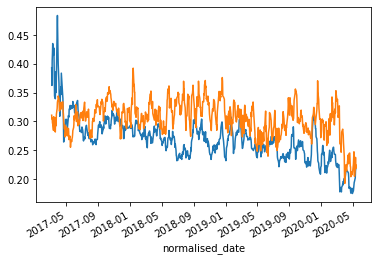

In [38]:
df_trends.sentiment_empresas_trend_es.plot()
df_trends.sentiment_empresas_trend_pe.plot()


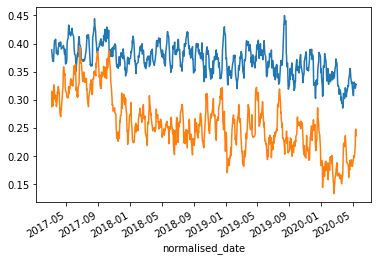

In [39]:
df_trends.sentiment_asoc_trend_es.plot()
df_trends.sentiment_asoc_trend_pe.plot()

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(df_trends_es[['sentiment_asoc_trend','sentiment_empresas_trend']], maxlag=5, verbose=True)







Granger Causality
number of lags (no zero) 1
ssr based F test:         F=10.7394 , p=0.0011  , df_denom=835, df_num=1
ssr based chi2 test:   chi2=10.7780 , p=0.0010  , df=1
likelihood ratio test: chi2=10.7092 , p=0.0011  , df=1
parameter F test:         F=10.7394 , p=0.0011  , df_denom=835, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.9151  , p=0.0004  , df_denom=832, df_num=2
ssr based chi2 test:   chi2=15.9253 , p=0.0003  , df=2
likelihood ratio test: chi2=15.7757 , p=0.0004  , df=2
parameter F test:         F=7.9151  , p=0.0004  , df_denom=832, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.5779  , p=0.0001  , df_denom=829, df_num=3
ssr based chi2 test:   chi2=22.9257 , p=0.0000  , df=3
likelihood ratio test: chi2=22.6169 , p=0.0000  , df=3
parameter F test:         F=7.5779  , p=0.0001  , df_denom=829, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.3215  , p=0.0001  

In [26]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_trends_pe[['sentiment_asoc_trend','sentiment_empresas_trend']], maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6638  , p=0.4155  , df_denom=805, df_num=1
ssr based chi2 test:   chi2=0.6663  , p=0.4144  , df=1
likelihood ratio test: chi2=0.6660  , p=0.4145  , df=1
parameter F test:         F=0.6638  , p=0.4155  , df_denom=805, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2857  , p=0.0379  , df_denom=802, df_num=2
ssr based chi2 test:   chi2=6.6123  , p=0.0367  , df=2
likelihood ratio test: chi2=6.5854  , p=0.0372  , df=2
parameter F test:         F=3.2857  , p=0.0379  , df_denom=802, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3136  , p=0.0747  , df_denom=799, df_num=3
ssr based chi2 test:   chi2=7.0015  , p=0.0719  , df=3
likelihood ratio test: chi2=6.9712  , p=0.0728  , df=3
parameter F test:         F=2.3136  , p=0.0747  , df_denom=799, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0202  , p=0.0898  

In [41]:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")

#apply adf test on the series
adf_test(df_trends_es["sentiment_asoc_trend"])

Test Statistic           -2.066965
p-value                   0.258004
# Lags                   21.000000
# Observations          817.000000
Critical Value (1%)      -3.438379
Critical Value (5%)      -2.865084
Critical Value (10%)     -2.568657
dtype: float64
 Series is Non-Stationary


In [29]:
granger_test = sm.tsa.stattools.grangercausalitytests(df_trends_pe[['sentiment_asoc_trend','peru_change']], maxlag=5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1733  , p=0.6773  , df_denom=805, df_num=1
ssr based chi2 test:   chi2=0.1739  , p=0.6766  , df=1
likelihood ratio test: chi2=0.1739  , p=0.6767  , df=1
parameter F test:         F=0.1733  , p=0.6773  , df_denom=805, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1407  , p=0.8688  , df_denom=802, df_num=2
ssr based chi2 test:   chi2=0.2831  , p=0.8680  , df=2
likelihood ratio test: chi2=0.2830  , p=0.8680  , df=2
parameter F test:         F=0.1407  , p=0.8688  , df_denom=802, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6997  , p=0.5524  , df_denom=799, df_num=3
ssr based chi2 test:   chi2=2.1174  , p=0.5484  , df=3
likelihood ratio test: chi2=2.1146  , p=0.5490  , df=3
parameter F test:         F=0.6997  , p=0.5524  , df_denom=799, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5080  , p=0.7299  

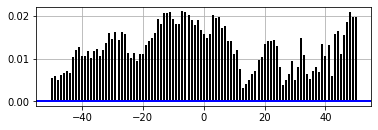

In [50]:
import matplotlib.pyplot as plt 
import numpy as np



fig = plt.figure() 
ax1 = fig.add_subplot(211) 
  
# cross correlation using xcorr() 
# function 
ax1.xcorr(df_trends.sentiment_asoc_trend_pe, df_trends.peru_change, usevlines=True,  
          maxlags=50, normed=True,  
          lw=2) 
  
# adding grid to the graph 
ax1.grid(True) 
ax1.axhline(0, color='blue', lw=2) 
  
# show final plotted graph 
plt.show()
